In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

In [75]:
dataframe = pd.read_csv ('/Users/nicolasdemuynck/BeCode/techtalk/house_market.csv')
dataframe.dropna (inplace= True)

In [76]:
dataframe.head (5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [77]:
dataframe.describe ()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


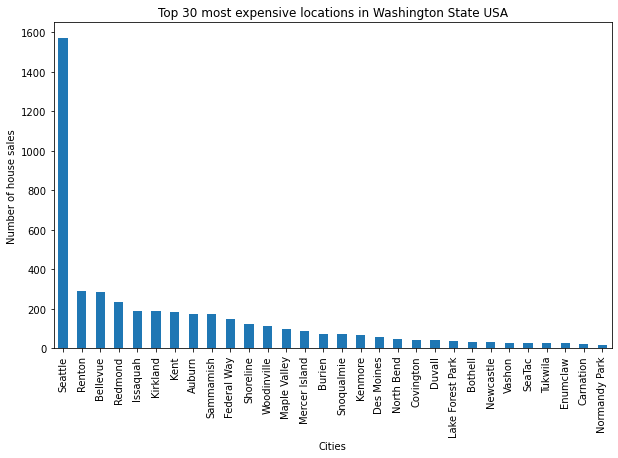

In [114]:
nbr = 30

data = dataframe.groupby('city').count().sort_values(['price'], ascending = False).head(nbr)

plt.figure(figsize = (10,6))

data.price.plot(kind='bar')

plt.xlabel ('Cities')
plt.ylabel ('Number of house sales')
plt.title ('Top 30 most expensive locations in Washington State USA')

plt.show ()

In [101]:
data = dataframe.loc[dataframe['city'] == 'Seattle']
data.head (5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.0,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.0,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA
11,2014-05-02 00:00:00,1400000.0,4.0,2.5,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
13,2014-05-02 00:00:00,365000.0,3.0,1.0,1090,6435,1.0,0,0,4,1090,0,1955,2009,2504 SW Portland Ct,Seattle,WA 98106,USA


In [102]:
df = data[['price', 'sqft_living', 'waterfront']]
df.head (5)

,price,sqft_living,waterfront
1,2384000.0,3650,0
5,490000.0,880,0
9,640000.0,1520,0
11,1400000.0,2920,0
13,365000.0,1090,0


In [103]:
df.describe ()

,price,sqft_living,waterfront
count,1.573000e+03,1573.000000,1573.000000
mean,5.798375e+05,1828.623649,0.002543
std,4.627382e+05,824.783359,0.050379
min,0.000000e+00,370.000000,0.000000
25%,3.690000e+05,1250.000000,0.000000
50%,4.900000e+05,1660.000000,0.000000
75%,6.705000e+05,2240.000000,0.000000
max,1.289900e+07,8670.000000,1.000000


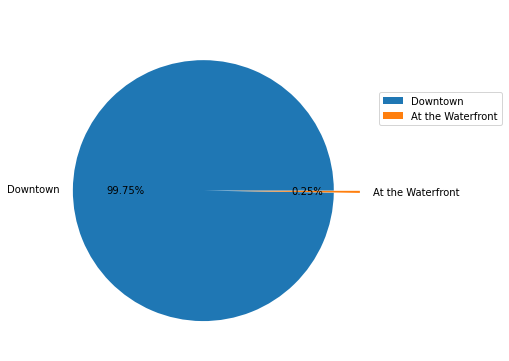

In [130]:
downtown = df.loc[df['waterfront'] == 0].count ()[0]
waterfront = df.loc[df['waterfront'] == 1].count()[0]

labels = ['Downtown', 'At the Waterfront']
explode = (.1,.1)

plt.figure(figsize = (10,6))

plt.pie((downtown, waterfront), labels = labels, autopct = '%.2f%%', explode = explode)

plt.title ('Location houses in Seattle', fontsize = 20, color = 'white')

plt.legend (loc = (1, 0.7))

plt.show ()

In [84]:
df.corr ()

,price,sqft_living,waterfront
price,1.000000,0.548448,0.110804
sqft_living,0.548448,1.000000,0.091328
waterfront,0.110804,0.091328,1.000000


In [85]:
x1 = df[['sqft_living', 'waterfront']]
y = df.price

In [86]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     343.7
Date:                Wed, 04 Nov 2020   Prob (F-statistic):          1.57e-124
Time:                        15:21:00   Log-Likelihood:                -22466.
No. Observations:                1573   AIC:                         4.494e+04
Df Residuals:                    1570   BIC:                         4.495e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.147e+04   2.37e+04      0.905      0.366   -2.51e+04     6.8e+04
sqft_living   304.5656     11.858     25.685      0.000     281.307     327.825
waterfront   5.624e+05   1.94e+05      2.897      0.004    1.82e+05    9.43e+05
==============================================================================
Omnibus:                     3560.970   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26664633.839
Skew:                          20.324   Prob(JB):                         0.00
Kurtosis:                     639.540   Cond. No.                     4.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

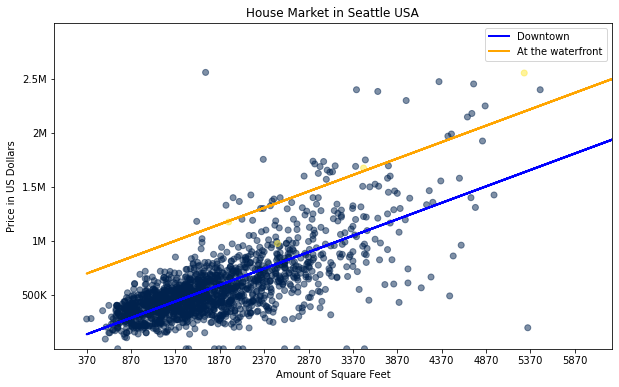

In [67]:
plt.figure(figsize = (10,6))

plt.scatter (df.sqft_living, df.price, c = df.waterfront,  cmap='cividis', alpha = 0.5)

plt.title ('House Market in Seattle USA')
plt.xlabel ('Amount of Square Feet')
plt.ylabel ('Price in US Dollars')

plt.xlim (0, np.percentile(df.sqft_living, 99.9))
plt.ylim(0, np.percentile(df.price, 99.9))


plt.xticks (np.arange(np.percentile(df.sqft_living,0), np.percentile(df.sqft_living,99.9), 500))
plt.yticks ([500000, 1000000, 1500000, 2000000, 2500000],
           ['500K', '1M', '1.5M', '2M', '2.5M'])

yhat_no = (df.sqft_living * 304.5656) + 21470
yhat_yes = (df.sqft_living * 304.5656) + (21470+562400)

fig1 = plt.plot (df.sqft_living, yhat_no, lw = 2, c= 'b', label = 'Downtown')
fig2 = plt.plot (df.sqft_living, yhat_yes, lw = 2, c= 'orange', label = 'At the waterfront')

plt.legend ()

plt.show ()

In [47]:
x

,const,sqft_living,waterfront
1,1.0,3650,0
5,1.0,880,0
9,1.0,1520,0
11,1.0,2920,0
13,1.0,1090,0
...,...,...,...
4582,1.0,1290,0
4585,1.0,1890,0
4591,1.0,1880,0
4595,1.0,1510,0


In [48]:
new_data = pd.DataFrame ({'const': 1, 'sqft_living': [1500, 2000], 'waterfront': [1,0]})
new_data

,const,sqft_living,waterfront
0,1,1500,1
1,1,2000,0


In [49]:
predictions = results.predict (new_data)
predictions

0    1.040691e+06
1    6.306027e+05
dtype: float64

In [50]:
new_data['predictions'] = round(predictions, 2)
new_data

,const,sqft_living,waterfront,predictions
0,1,1500,1,1040690.67
1,1,2000,0,630602.74
